<table align="left" style="border-style: hidden" class="table"> <tr><td class="col-md-2"><img style="float" src="http://prob140.org/assets/icon256.png" alt="Prob140 Logo" style="width: 120px;"/></td><td><div align="left"><h3 style="margin-top: 0;">Probability for Data Science</h3><h4 style="margin-top: 20px;">UC Berkeley, Spring 2019</h4><p>Ani Adhikari and Jim Pitman</p>CC BY-NC 4.0</div></td></tr></table><!-- not in pdf -->

# Homework 7 #

### Instructions

Your homeworks have two components: a written portion and a portion that also involves code.  Written work should be completed on paper, and coding questions should be done in the notebook.  You are welcome to LaTeX your answers to the written portions, but staff will not be able to assist you with LaTeX related issues. It is your responsibility to ensure that both components of the homework are submitted completely and properly to Gradescope. Refer to the bottom of the notebook for submission instructions.

In [1]:
# Run this cell to set up your notebook

import numpy as np
from scipy import stats
from datascience import *
from prob140 import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# These lines make warnings look nicer
import warnings
warnings.simplefilter('ignore', FutureWarning)

### 1. The Exact Distribution of a Sum ###
In this exercise we will use the same shorthand as in the textbook: "A random variable $W$ has distribution given by the probabilities $p_0, p_1, \ldots, p_N$" means that $P(W = i) = p_i$ for $0 \le i \le N$ and $\sum_{i=0}^N p_i = 1$.

Before you start this exercise, carefully go through the code in [Section 14.2](http://prob140.org/textbook/chapters/Chapter_14/02_PGFs_in_NumPy) of the textbook. As always, feel free to create more code cells as needed.

**a) [CODE]** Let $X$ have the distribution given by $p_0 = 0.45$, $p_1 = 0.25$, $p_3 = 0.2$, $p_4 = 0.05$, $p_5 = 0.05$. Construct the pgf of $X$.

**b) [CODE]** Let $X_1, X_2, \ldots, X_8$ be i.i.d. with the same distribution as $X$ in (a). Let $S_X = X_1 + X_2 + \cdots + X_8$. Use `Plot` to plot the probability histogram of $S_X$. 

**c) [CODE]** Find $P(S_X = 13)$.

**d) [CODE]** Let $Y$ have the uniform distribution on the integers 4 through 8. Let $Y_1, Y_2, \ldots, Y_{12}$ be i.i.d. with the same distribution as $Y$, and let $S_Y = Y_1 + Y_2 + \cdots + Y_{12}$. Use `Plot` to plot the histogram of the distribution of $W = S_X + S_Y$.

**e) [CODE]** For a `prob140` distribution object `dist`, the expression `dist.ev()` evaluates to the expectation and `dist.sd()` evaluates to the SD. At this point you should already have a distribution object representing $W$, so use these methods to find $E(W)$ and $SD(W)$. To check that you found the right distribution of $W$, use `.ev()` and `.sd()` to find the expectations and SDs of $X$ and $Y$, and then use rules of expectation and variance to find $E(W)$ and $SD(W)$. Confirm that these are the same as what you got from directly using the distribution of $W$. 

In [6]:
#Answer to 1a

# Construct the distribution of X
dist_X = Table().values(np.arange(6)).probability(make_array(0.45, 0.25, 0, 0.2, 0.05, 0.05))

# Extract the array of probabilities
probs_X = dist_X[1]

# Get the coefficients of the pgf in the appropriate order
coeffs_X = np.flipud(probs_X)

# Construct the pgf
pgf_X =  np.poly1d(coeffs_X)

# Display the pgf
print(pgf_X)

      5        4       3
0.05 x + 0.05 x + 0.2 x + 0.25 x + 0.45


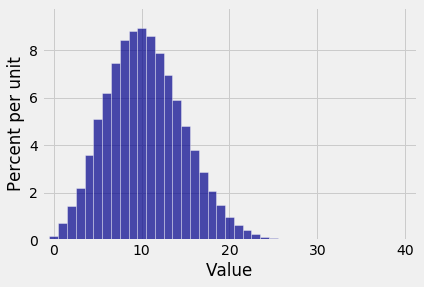

In [7]:
#Answer to 1b

pgf_SX = pgf_X**8 # pgf of S_X
coeffs_SX = pgf_SX.c # coefficients of pgf of S_X

# Distribution object for S_X
# Careful ...
# Think how you will extract the possible values and corresponding chances.
# Use extra lines if you need them.

probs_SX = np.flipud(coeffs_SX)
dist_SX = Table().values(np.arange(41)).probability(probs_SX)

Plot(dist_SX)

In [9]:
#Answer to 1c
probs_SX[13]

0.06964776875000002

In [10]:
np.arange(4, 9)

array([4, 5, 6, 7, 8])

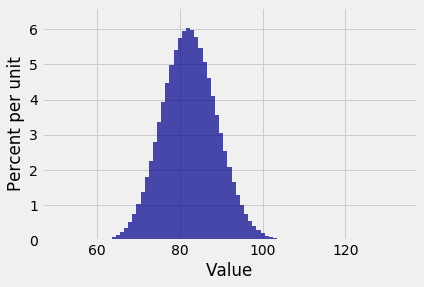

In [15]:

#Answer to 1d

# The following is provided as a very brief skeleton
# The solution uses more lines than are provided in the skeleton
# Be sure to refer to your setup for (1a) and (1b)

dist_Y = Table().values(np.arange(9)).probability(make_array(0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2, 0.2)) # distribution object for Y
probs_Y = dist_Y[1]
coeffs_Y = np.flipud(probs_Y)
pgf_Y =  np.poly1d(coeffs_Y)# pgf of Y
pgf_SY =  pgf_Y**12 # pgf of S_Y
pgf_W = pgf_SY*pgf_SX # pgf of W = S_X + S_Y
probs_W = np.flipud(pgf_W.c)
dist_W =  Table().values(np.arange(137)).probability(probs_W)# distribution object for W

Plot(dist_W)

In [17]:
#Answer to 1e

# Use dist_W here
print("E(W) =", dist_W.ev())
print("SD(W) =", dist_W.sd())

# Use dist_X and dist_Y here

print("E(W) =", dist_X.ev()*8 + dist_Y.ev()*12)
print("SD(W) =", ((dist_X.sd()**2)*8 + (dist_Y.sd()**2)*12)**0.5)


E(W) = 82.40000000000006
SD(W) = 6.578753681359413
E(W) = 82.4
SD(W) = 6.578753681359411


#newpage

### 2. Another Use of the PGF ###
Let $X$ be a random variable with possible values $0, 1, \ldots, N$ for a fixed $N$, and for $0 \le i \le N$ let $p_i = P(X = i)$. Let $G$ be the pgf of $X$, that is, let

$$
G(s) ~ = ~ p_0 + p_1s + p_2 s^2 + \cdots + p_N s^N ~~~ -\infty < s < \infty
$$

**a)** Start by finding the value of $G(0)$ and recognize it as a probability associated with $X$. Now consider the first derivative of $G$, defined by

$$
G^{(1)}(s) ~ = ~ \frac{d}{ds} G(s), ~~~ -\infty < s < \infty
$$

Calculate $G^{(1)}(s)$ and hence identify $G^{(1)}(0)$ and $G^{(1)}(1)$ as probabilities and expectations related to $X$.

**b)** Next, consider the second derivative of $G$:

$$
G^{(2)}(s) ~ = ~ \frac{d^2}{ds^2} G(s), ~~~ -\infty < s < \infty
$$

Recognize (you don't have to prove these) $G^{(2)}(0)$ and $G^{(2)}(1)$ as probabilities and expectations related to $X$. At this point you should start to see why $G$ is called the "probability generating" function; you can use it to generate the probabilities in the distribution of $X$.

**c)** Write a formula for $Var(X)$ in terms of the derivatives of $G$.

**d)** We have defined the probability generating function of a random variable with finitely many non-negative integer values. The definition extends to random variables with infinitely many non-negative integer values, but you have to restrict the domain to $-1 < s < 1$ so that the infinite sum converges:

$$
G(s) ~ = \sum_{i=0}^\infty p_is^i, ~~~ -1 < s < 1
$$

This is an example of an *infinite power series*. Such series have nice properties. In particular, you can assume that the results you discovered in parts (a), (b), and (c) hold provided all the sums converge, which they do in the example you are about to explore. 

Let $X$ have the geometric $(p)$ distribution on $\{0, 1, 2, 3, \ldots \}$, so that $P(X = i) = q^ip$ for $i \ge 0$; here $q = 1-p$. You can think of $X$ as the number of failures before the first success in a sequence of i.i.d. Bernoulli $(p)$ trials. Find the pgf of $X$; simplify any infinite sums in your answer. 

**e)** [Continuing Part (d)] Differentiate the probability generating function twice, and use the results of (a) and (c) to find $E(X)$ and $Var(X)$.

**f)** Consider i.i.d. Bernoulli $(p)$ trials and let $T$ be the number of trials till the first success. Use the results of (e) to write down $E(T)$ and $Var(T)$ with little or no further calculation. (You do already know $E(T)$, but derive it from (e) anyway.)

#newpage

### 3. What's Normal? ###
In any part of this question that involves a sample size, you can assume the sample size is big enough for the Central Limit Theorem approximation to be good. But pay attention to what is being approximated by the CLT.

**a)** In a simple random sample of 1000 faculty taken among all universities in a country, the number of papers published by the sampled faculty in the past year had a mean of 1.1 and an SD of 1.8. Does the Central Limit Theorem say that the distribution of the number of papers published by the sampled faculty in the past year is roughly normal? If not, what do you think is the shape of that distribution? Explain based on the information given in the problem.

**b)** Continuing part (a), construct an approximate 90% confidence interval for the mean number of papers published by faculty at all universities in the country in the past year. Justify your answer. If it is not possible to construct the interval, explain why not.

#newpage

### 4. Widths of Confidence Intervals ###
In any part of this question that involves a sample size, you can assume the sample size is big enough for the Central Limit Theorem approximation to be good.

**a)** A survey organization has used the methods of our class to construct an approximate 95% confidence interval for the mean annual income of households in a county. The interval runs from \$66,000 to \$70,000. If possible, find an approximate 99% confidence interval for the mean annual income of households in the county. If this is not possible, explain why not.

**b)** A survey organization is going to take a simple random sample of $n$ voters from among all the voters in a state, to construct a 99% confidence interval for the proportion of voters who favor a proposition. Find an $n$ such that the total width of the confidence interval (left end to right end) will be no more than 0.06. [Remember that you can bound the variance of an indicator.]

#newpage

### 5. Relations Between Three Well Known Distributions ###

**a)** Let $U$ be uniform on $(0, 1)$ and let $X = -\log(U)$. Find the possible values of $X$ and the cdf of $X$. Recognize that $X$ has a well known distribution and provide its name and parameters.

**b)** Products of uniform $(0, 1)$ random samples arise when the data are "fractions of fractions of fractions of ..." some quantity. Let $U_1, U_2, \ldots, U_n$ be an i.i.d. uniform $(0, 1)$ sample and let $Y = (U_1U_2 \cdots U_n)^{\frac{1}{n}}$ be the *geometric mean* of the sample. If $n$ is large, approximately what is the distribution of $\log(Y)$?

**c)** Let $Z$ be standard normal and let $W = e^Z$. Then $\log(W) = Z$, that is, the log of $W$ has a normal distribution. That is why the distribution of $W$ is called *lognormal*. Find the cdf of $W$ in terms of the standard normal cdf $\Phi$, and hence find the density of $W$ in terms of the standard normal density $\phi$.

#newpage

### 6. A Mixture ###
This is a problem from Pitman's text. 

Transistors produced by one machine have a lifetime that is exponentially distributed with mean 100 hours. Those produced by a second machine have an exponentially distributed lifetime with mean 200 hours. A package of 12 transistors contains 4 produced by the first machine and 8 produced by the second. Let $X$ be the lifetime of a transistor picked at random from the package. We say that the distribution of $X$ is a *mixture* of the two exponential distributions.

**a)** Find the numerical value of $P(X > 200)$. You don't have to turn in the code; just show your math, then create a cell in any of your notebooks to calculate the value, and report the value at the end of your math calculation. For a number $c$, the expression `np.exp(c)` evaluates to $e^c$.

**b)** Find the numerical value of $E(X)$. 

**c)** Find $E(X^2)$ and hence find the numerical values of $Var(X)$ and $SD(X)$.

[$Var(X)$ is greater the weighted average of the two variances. You should try to think about why.]

**d)** For $x > 0$, find $P(X \in dx)$ by conditioning on the type of machine, and hence find the density of $X$.

In [4]:
4/12*2*100**2 + 8/12*2*200**2

59999.99999999999

In [6]:
(60000 - (166.67)**2)**0.5

179.5023985912166

## Submission Instructions ##

Many assignments throughout the course will have a written portion and a code portion. Please follow the directions below to properly submit both portions.

### Written Portion ###
*  Scan all the pages into a PDF. You can use any scanner or a phone using applications such as CamScanner. Please **DO NOT** simply take pictures using your phone. 
* Please start a new page for each question. If you have already written multiple questions on the same page, you can crop the image in CamScanner or fold your page over (the old-fashioned way). This helps expedite grading.
* It is your responsibility to check that all the work on all the scanned pages is legible.

### Code Portion ###
* **Save your notebook using File > Save and Checkpoint.**
* Run the cell below to generate a PDF file.
* Download the PDF file and confirm that none of your work is missing or cut off.  If the link leads you to a blank page, use [Command]+[S] or [Ctrl]+[S] to download your work.  

### Submitting ###
* Combine the PDFs from the written and code portions into one PDF.  [Here](https://smallpdf.com/merge-pdf) is a useful tool for doing so.  
* Submit the assignment to Homework 7 on Gradescope.
* **Make sure to assign each page of your pdf to the correct question.**


### **We will not grade assignments which do not have pages selected for each question or were submitted after the deadline.** 

In [1]:
import gsExport
gsExport.generateSubmission("Homework_07.ipynb")

Processing Homework_07.ipynb
Generated notebook and autograded
Attempting to compile LaTeX
Finished generating PDF
